In [73]:
pwd

'/home/wsuser/work'

In [103]:
!pip install tensorflow==2.7


     |████████████████████████████████| 489.7 MB 14 kB/s s eta 0:00:01
     |████████████████████████████████| 463 kB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 68.4 MB/s eta 0:00:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0
    Uninstalling tensorflow-2.11.0:
      Successfully uninstalled tensorflow-2.11.0


In [105]:
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Flatten, Conv2D
from keras.optimizer_v1 import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [106]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('*'*20)
print(X_train.shape)
print(X_test.shape)
print('*'*20)

********************
(60000, 28, 28)
(10000, 28, 28)
********************


In [107]:
print(X_train[0])
print('===============')
print(Y_train)
print('-------------')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

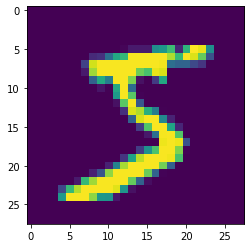

In [108]:
plt.imshow(X_train[0])

In [109]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test  = X_test.reshape(10000,28,28,1).astype('float32')

In [110]:
no_classes=10
Y_train = np_utils.to_categorical(Y_train,no_classes)
Y_test = np_utils.to_categorical(Y_test,no_classes)

In [111]:
print('===========')
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [112]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3), activation='relu'))

In [113]:
model.add(Flatten())

model.add(Dense(no_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=2, batch_size=32)

metrics= model.evaluate(X_test,Y_test,verbose=0)

Epoch 1/2
1875/1875 [==============================] - 116s 62ms/step - loss: 0.1956 - accuracy: 0.9528 - val_loss: 0.0738 - val_accuracy: 0.9783
Epoch 2/2
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0678 - accuracy: 0.9791 - val_loss: 0.0802 - val_accuracy: 0.9752


In [114]:
print("Metrics")
print(metrics)


Metrics
[0.08019200712442398, 0.9751999974250793]


In [115]:
prediction=model.predict(X_test[:4])
print(prediction)

[[3.8132050e-10 7.9915354e-12 1.0887989e-06 7.3307160e-07 3.6922194e-11
  4.1211843e-11 4.9984854e-16 9.9999321e-01 3.4116999e-06 1.5698962e-06]
 [7.6159070e-09 1.2180611e-08 9.9999881e-01 3.2739207e-11 1.0908823e-12
  2.3887512e-14 1.1585561e-06 1.2698759e-11 5.9580271e-11 1.3400658e-13]
 [3.5934406e-08 9.9982870e-01 2.3034621e-05 6.9078027e-08 9.6569001e-06
  4.6743967e-06 1.6117036e-07 5.2769330e-05 8.0933845e-05 2.4946262e-08]
 [9.9998975e-01 4.1824990e-12 1.2717479e-07 5.4339253e-09 4.8759628e-11
  3.2465014e-10 8.8360139e-06 2.2545139e-07 3.9357104e-08 1.0276456e-06]]


In [116]:
print(np.argmax(prediction,axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [117]:
model.save('digit.h5')

In [119]:
ls


digit.h5  digit_recognition-model_new.tgz


In [120]:
!tar -zcvf digit_recognition-model_new.tgz digit.h5

digit.h5


In [142]:
ls -1

digit.h5
digit_recognition-model_new.tgz


In [143]:
 !pip install  watson-machine-learning-client  --upgrade

In [132]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"bwKUeUuq-2ivkT6dcL-VFdRl8zwaW7zyVmi6a-6tno8U",
                  }

client = APIClient(wml_credentials)
client

In [133]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/b948ad778cd24852b63b8a45a0682bf6:40530543-7f48-4ddc-9399-0f46fa727ecb::',
      'guid': '40530543-7f48-4ddc-9399-0f46fa727ecb',
      'name': 'Watson Machine Learning-24',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'recog',
    'scope': {'bss_account_id': 'b948ad778cd24852b63b8a45a0682bf6'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '99845d27-ab24-4131-a826-7c117871c3b3',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '04dc1f04dd244049b0970a93cf8abe17',
        'api_key': 'UnWAwUmAYIggTIF70-ctiVugQYz9BcqFf9dqsark--Ha',
        'secret_access_key': '844a6bf7f07a0edbbd93486dadbe22bb69599cde7263e17a',
        'service_id': 'ServiceId-1350f94c-7d4c-4cee-9776-eeacb8f962ba'},
       'editor': {'access_key_id': 'b2ab4f20d6ee44abb09c73757bba3565',
        'api_key': 'AW7

In [148]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
#     print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [149]:
space_uid = guid_from_space_name(client, 'Deploy_Model')
print("Space UID= " + space_uid)

Space UID= 1912427b-592d-4ed4-8b4a-6aeb24e0bc17


In [150]:
client.set.default_space(space_uid)

'SUCCESS'

In [151]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [152]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [154]:
model_details = client.repository.store_model(model='digit_recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"digit_recognition",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})


In [155]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T09:05:37.248Z',
  'id': 'cf7b6cdd-098a-4f03-98b8-c9e5713735cd',
  'modified_at': '2022-11-18T09:05:39.754Z',
  'name': 'digit_recognition',
  'owner': 'IBMid-67100110ZR',
  'resource_key': '6fd70f35-b9b0-4b38-81cc-ef825facfc0e',
  'space_id': '1912427b-592d-4ed4-8b4a-6aeb24e0bc17'},
 'system': {'warnings': []}}

In [156]:
model_id = client.repository.get_model_id(model_details)
model_id

'cf7b6cdd-098a-4f03-98b8-c9e5713735cd'

In [157]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/DigitRecog_IBM_model.tar.gz'

In [158]:
ls

digit.h5  DigitRecog_IBM_model.tar.gz  digit_recognition-model_new.tgz


## Test Model

In [159]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [160]:
model = load_model("digit.h5")

In [167]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5gXplSjKpJ8lUiKPWrCby851bY3T5r5MOm555qa0_DCy',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitrecognition-donotdelete-pr-tjlvdr1ea2gte2'
object_key = '3.png'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5gXplSjKpJ8lUiKPWrCby851bY3T5r5MOm555qa0_DCy',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitrecognition-donotdelete-pr-tjlvdr1ea2gte2'
object_key = '3.png'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [168]:
img = Image.open(streaming_body_2).convert("L") 
img = img.resize( (28,28) ) 

In [169]:
img

In [170]:
im2arr = np.array(img)
im2arr = im2arr.reshape(1, 28, 28, 1) 

In [171]:
pred = model.predict(im2arr)
print(pred)

[[4.2941215e-06 9.9585813e-13 8.4451250e-07 9.9999464e-01 3.5585750e-11
  5.0499325e-09 4.5328252e-11 2.7439751e-07 8.9795921e-11 5.0445596e-13]]


In [172]:
print(np.argmax(pred, axis=1)) #printing our Labels

[3]
